# 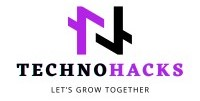 
# Data Analytics Internship Tasks                     



# Task 1 : Perform Data Cleaning 
# Clean a dataset by removing missing values and outliers.

In [1]:
# import all required libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#READ THE DATSET
df = pd.read_csv("/kaggle/input/titanic-dataset/titanic_dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#info of dataset including missing values
print(df.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values )

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


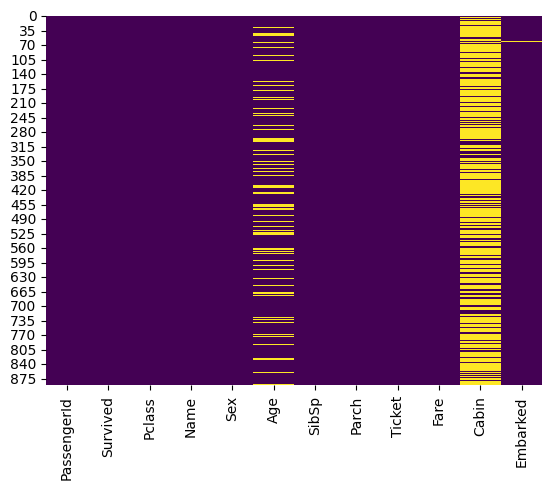

In [5]:
#visualize the missing data
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.show()

In [6]:
#Handle the missing values

**so, here for numerical value fill it with mean and for categorical value fill it with 'unknown'.**

In [7]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

In [8]:
categorical_columns = df.select_dtypes(include='object').columns
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

In [9]:
# Chcek if any missing value is left after handling
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [10]:
#save the dataset
df.to_csv('titanic_dataset_cleaned.csv', index=False)

In [11]:
#visualization of outliers in dataset

**So in given data we can see the diff ranges in age & fare so for these two columns we will check outliers.**

<Axes: xlabel='Fare'>

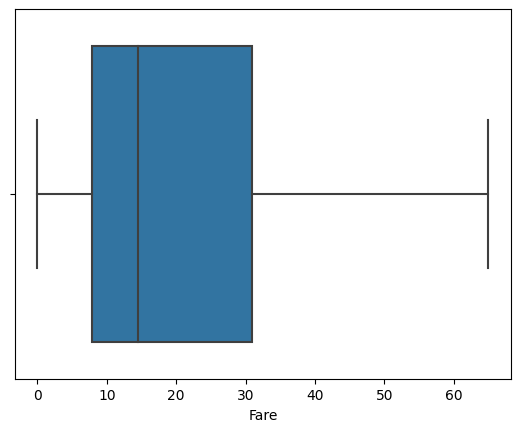

In [12]:
sns.boxplot(x=df.Fare,showfliers=False)

<Axes: xlabel='Age'>

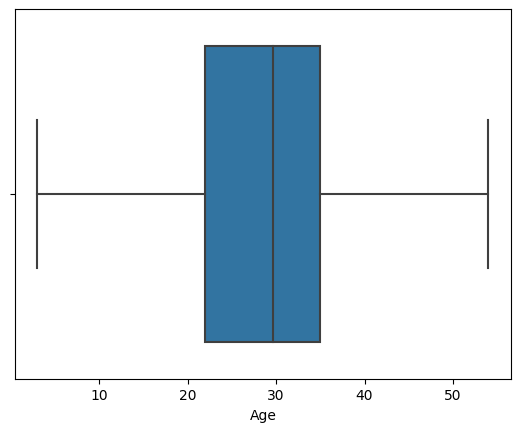

In [13]:
sns.boxplot(x=df.Age,showfliers=False)

In [14]:
#check the outliers for fare column
def remove_outliers_IQR(df, Fare, threshold=1.5):
    Q1 = df["Fare"].quantile(0.25)
    Q3 = df["Fare"].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return df[(df["Fare"] >= lower_bound) & (df['Fare'] <= upper_bound)]

In [15]:
#here df1 is new dataframe with no missing values and without outliers in fare column
columns_to_check = ['Fare']
for col in columns_to_check:
    df1= remove_outliers_IQR(df, col)

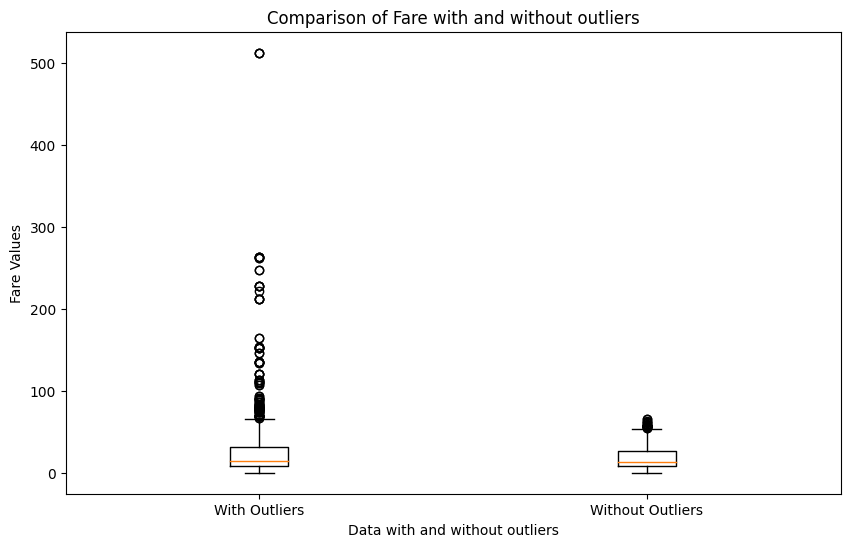

In [16]:
#comparsion between with and without outliers in fare column for better understanding
plt.figure(figsize=(10, 6))
plt.boxplot([df['Fare'], df1['Fare']], labels=['With Outliers', 'Without Outliers'])
plt.title('Comparison of Fare with and without outliers')
plt.xlabel('Data with and without outliers')
plt.ylabel('Fare Values')
plt.show()

In [17]:
#check the outliers for age column
def remove_outliers_IQR(df, Fare, threshold=1.5):
    Q1 = df1["Age"].quantile(0.25)
    Q3 = df1["Age"].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return df1[(df1["Age"] >= lower_bound) & (df1['Age'] <= upper_bound)]

In [18]:
#here df2 is new dataframe with no missing values and without outliers in age column
columns_to_check = ['Age']
for col in columns_to_check:
    df2 = remove_outliers_IQR(df1, col)

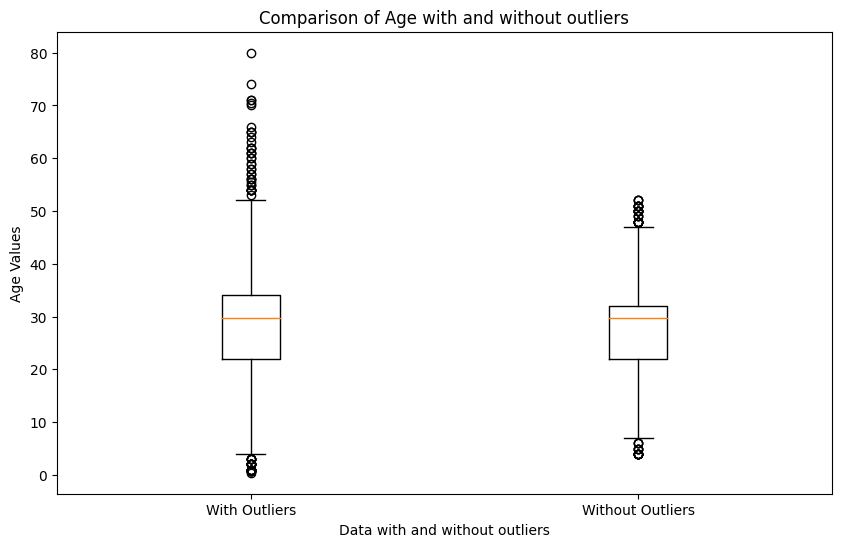

In [19]:
#comparsion between with and without outliers in age column for better understanding
plt.figure(figsize=(10, 6))
plt.boxplot([df1['Age'], df2['Age']], labels=['With Outliers', 'Without Outliers'])
plt.title('Comparison of Age with and without outliers')
plt.xlabel('Data with and without outliers')
plt.ylabel('Age Values')
plt.show()

# Task 2 : Calculate summary statistics
# Calculate summary statistics (mean, median, mode, standard deviation) for a dataset.

In [20]:
# import all required libaries
import pandas as pd
import numpy as np

In [21]:
#READ THE DATSET
data = pd.read_csv("/kaggle/input/tit-dataset/tit.csv")

In [22]:
# Summary statistics
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,156.000000,156.000000,156.000000,126.000000,156.000000,156.000000,156.000000
mean,78.500000,0.346154,2.423077,28.141508,0.615385,0.397436,28.109587
std,45.177428,0.477275,0.795459,14.613880,1.056235,0.870146,39.401047
min,1.000000,0.000000,1.000000,0.830000,0.000000,0.000000,6.750000
25%,39.750000,0.000000,2.000000,19.000000,0.000000,0.000000,8.003150
50%,78.500000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,117.250000,1.000000,3.000000,35.000000,1.000000,0.000000,30.371850
max,156.000000,1.000000,3.000000,71.000000,5.000000,5.000000,263.000000


In [23]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:",categorical_columns)

# Identify numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical columns:",numerical_columns)

Categorical columns: ['Lname', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


**Now we will perform statistics for numerical column i.e selected_columns.**

In [24]:
selected_columns = data.loc[:, numerical_columns]

In [25]:
#lets check for mean for each column
column_means = selected_columns.mean()
print("Mean for each column:" ,column_means )

Mean for each column: PassengerId    78.500000
Survived        0.346154
Pclass          2.423077
Age            28.141508
SibSp           0.615385
Parch           0.397436
Fare           28.109587
dtype: float64


In [26]:
#lets check for median for each column
column_median = selected_columns.median()
print("Median for each column:" ,column_median )

Median for each column: PassengerId    78.5000
Survived        0.0000
Pclass          3.0000
Age            26.0000
SibSp           0.0000
Parch           0.0000
Fare           14.4542
dtype: float64


In [27]:
#lets check for mode for each column
column_modes = selected_columns.mode().iloc[0]
print("Modes for each column:" ,column_modes )

Modes for each column: PassengerId     1.00
Survived        0.00
Pclass          3.00
Age            21.00
SibSp           0.00
Parch           0.00
Fare            8.05
Name: 0, dtype: float64


In [28]:
#lets check for standard deviation for each column
column_std_deviation = selected_columns.std()
print("Standard Deviation for each column:" ,column_std_deviation )

Standard Deviation for each column: PassengerId    45.177428
Survived        0.477275
Pclass          0.795459
Age            14.613880
SibSp           1.056235
Parch           0.870146
Fare           39.401047
dtype: float64


**so from above we know that for sex & survived have only two variables, the we can check for groupby mean.**

In [29]:
data.groupby(["Sex", "Survived"])["Age"].mean()

Sex     Survived
female  0           20.633333
        1           26.265625
male    0           31.228571
        1           23.314444
Name: Age, dtype: float64

# Task 3 : Visualization using Histogram
# Create a histogram or bar chart to visualize the distribution of data in a dataset.

In [30]:
# import all required libaries
import matplotlib.pyplot as plt

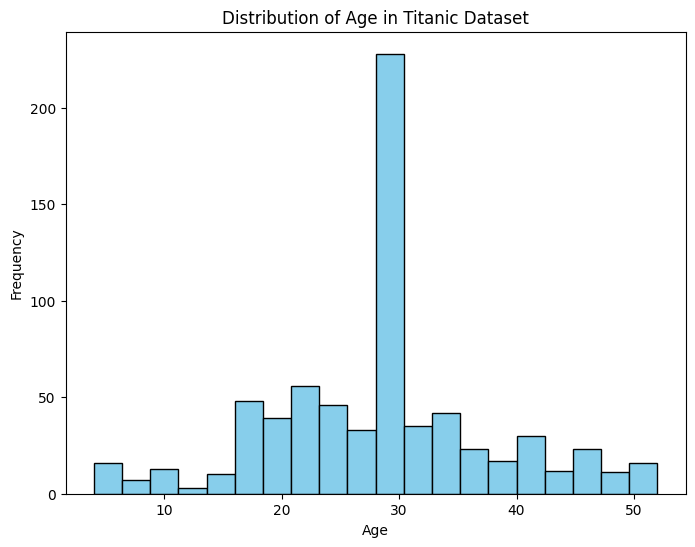

In [31]:
# Let's create a histogram for the 'Age' column

# Create the histogram
plt.figure(figsize=(8, 6)) 
plt.hist(df2['Age'], bins=20, color='skyblue', edgecolor='black')

# Add labels and a title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age in Titanic Dataset')

# Show the histogram
plt.show()

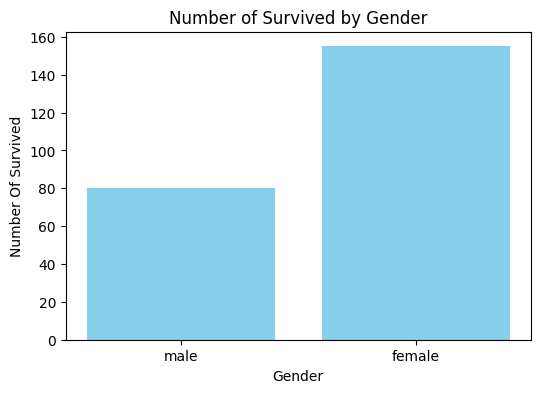

In [32]:
# Let's create a bar chart for count survived passengers for each gender

# Get unique values of Sex
unique_genders = df2['Sex'].unique()

# Count survived passengers for each gender
survived_counts = {}
for gender in unique_genders:
    survived_counts[gender] = df2[df2['Sex'] == gender]['Survived'].sum()

# Convert survived_counts to a list
survived_counts_list = list(survived_counts.values())

# Create a list of corresponding genders
gender_list = list(survived_counts.keys())

# Plotting the bar chart
plt.figure(figsize=(6, 4))
plt.bar(gender_list, survived_counts_list, color='skyblue')
plt.title('Number of Survived by Gender')
plt.xlabel('Gender')
plt.ylabel('Number Of Survived')
# Show the plot
plt.show()

# Task 4 : Pivote Table
# Use pivot tables to summarize data in a dataset.

In [33]:
# import all required libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
# Pivot table show mean of Age & Fare for each gender
table= pd.pivot_table(data=data,index=['Sex'],values=['Age','Fare'],aggfunc='mean')
table

,Age,Fare
Sex,,
female,24.468085,28.460639
male,30.326962,27.912998


<Axes: xlabel='Sex'>

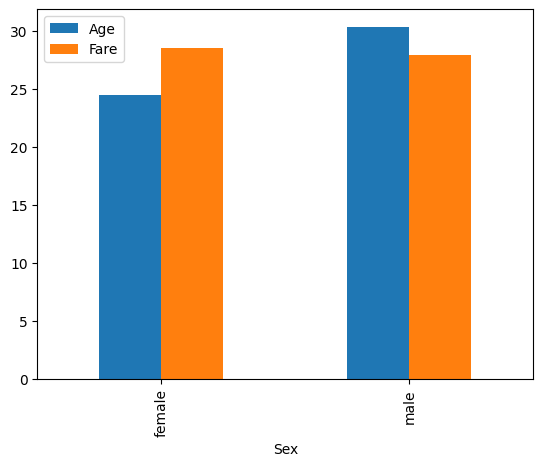

In [35]:
#Let's create a bar chart for show mean of Age & Fare for each gender
table.plot(kind="bar")

In [36]:
# Pivot table show Age and Survived by Sex and Embarked
table= pd.pivot_table(data=df2,index=['Sex','Embarked'],values=['Age','Survived'],aggfunc={'Age':np.mean,'Survived':np.sum})
table

Age  Survived
Sex    Embarked                     
female C         24.839824        26
       Q         27.750824        26
       S         27.234542       103
male   C         29.382029        18
       Q         27.749387         3
       S         29.232910        59

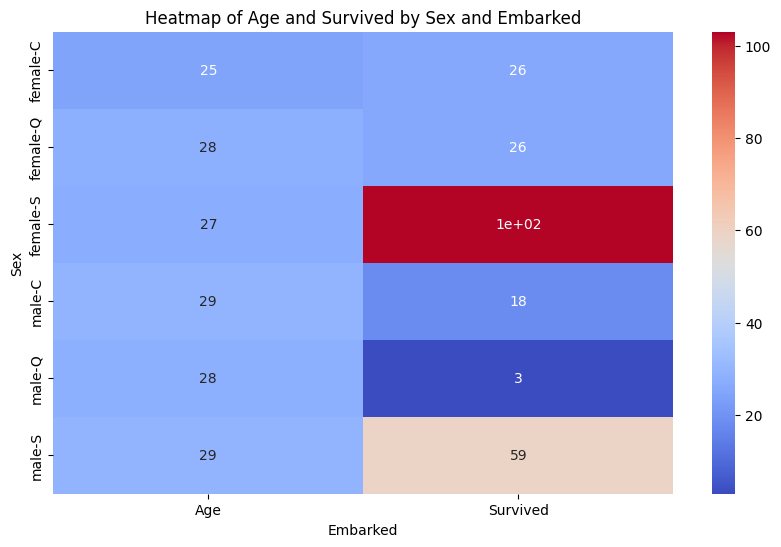

In [37]:
# Let's create a Heatmap for Age and Survived by Sex and Embarked
plt.figure(figsize=(10,6))
sns.heatmap(table, annot=True, cmap='coolwarm')
plt.title('Heatmap of Age and Survived by Sex and Embarked')
plt.xlabel('Embarked')
plt.ylabel('Sex')
plt.show()

# Task 5 : Remove Duplication
# Identify and remove duplicate values in a dataset.

In [38]:
#Print DataFrame to see how many duplicates.
print("Total of duplicates:", data.duplicated().sum())

data = data.drop_duplicates()

# Print the shape of the DataFrame to see how many duplicates were removed
print("Shape after removing duplicates:", data.shape)

Total of duplicates: 0
Shape after removing duplicates: (156, 13)
